<a href="https://colab.research.google.com/github/DavidJimenez10/CV-Deep-Learning/blob/main/MLOps_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Portada**


##**Nombre del Problema**

**Analisis de agrupamiento de contenido de Netflix**



https://www.kaggle.com/datasets/shivamb/netflix-shows

##**Participantes**

Sebastian David Jimenez Melo

Steven Acosta Calle

#**Life Time Cycle CRISP_ML(Q)**

##**1. Comprención del negocio y de los datos**

###**1.1 Planteamiento del problema**

Se desea realizar un análisis del mercado y las tendencias para la industria de entretenimiento de streaming con información del catálogo de Netflix, dentro de las características mas importantes tenemos tipo, país, rating y entre otras, las cuales nos ayudará a generar insights para la recomendación y generación de contenido.  
El objetivo con el aplicativo que se desea realizar es, aportar información que permita la toma de decisiones de entrada demercado y enfoque de contenidos mediante el entendimiento del catálogo actual de películas y series para determinar los grupos mas relevantes.

Como requisitos del aplicativo se debe garantizar la escalabilidad para integrar nuevas fuentes de información y para ello se requiere que el cliente provea información exógena de las películas o series: como la calificación del suscriptor, engagement sobre la audiencia, posición de reproducción en la que se entra la serie o película, entre otras.


###**1.2 Objetivo analítico**

Encontrar grupos de datos a partir de las características aportadas por el dataset usando uno de los métodos de agrupamiento no supervisado y garantizando la explicabilidad del modelo.

###**1.3 Riesgos y mitigaciones**

*   Completitud de los datos: es muy posible que varios registros no tengan disponible alguna de las características sin embargo esto es fácilmente mitigable usando la palabra ‘unknown’ o simplemente eliminando el registro de acuerdo a la necesidad especifica de cada característica.

*   Encontrar las características mas adecuadas para realizar el agrupamiento: es posible que las características seleccionadas no sean las mas adecuadas.

*   Falta del cumplimiento de los requisitos de datos exógenos por parte del cliente. 


###**1.5 KPI's**

El indicador de nuestro aplicativo esta centrado en el porcentaje de Likes que el suscriptor da a una película recomendada por nuestro aplicativo comparado con el porcentaje de Likes que el suscriptor da a una película buscada por él mismo.




$Calidad Recomendación = \% Like_{sistema} - \% Like_{usuario} $


El rango de valores de este KPI esta planteado entre 1 y -1, en donde 1 significa que todas las películas recomendadas han gustado y si ninguna de las recomendaciones gustaron pero todas las que el suscriptor busco si gustaron tiene una calificación de -1.


##**2. ENTENDER LOS DATOS**

###**2.1 Identificación de fuentes de datos**

Este dataset tabular consiste de un listado de todas las peliculas y series disponibles en Netflix en la mitad de 2021, el listado contiene 8807 registros los cuales poseen las siguientes caracteristicas:


*   show_id: identificador único
*   type: Pelicula o Serie
*   title: Titulo
*   director: Director(es)
*   cast: Actores
*   country: Pais de origen
*   date_added: Fecha en que fue añadido a Netflix
*   release_year: Año de Lanzamiento
*   rating: Clasificación de audiencia
*   duration: Duración en minutos o temporadas
*   listed_in: Genero del contenido
*   description: Resumen del contenido

###**2.2 Exploración y calidad de los datos**

In [ ]:
#Instalar librerias
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importar librerias

#Tratamiento de datos
import numpy as np
import pandas as pd

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.patches as mpatches

#Configuración de gráficos
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

#Modelamiento
from kmodes.kmodes import KModes

#Advertencias
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Cargar los datos
datos = pd.read_csv('netflix_titles.csv', quotechar='"')
datos.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#Tipos de datos de las caracteristicas
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
#Resumen estadistico de las caracteristicas
datos.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [ ]:
#Completitud de los datos
faltantes = datos.isna().sum()/len(datos)*100
porcentaje_faltantes = faltantes.sort_values(ascending=False)
print("Porcentaje de datos faltantes por columna:")
for indice, valor in porcentaje_faltantes.items():
  print(f'{indice} = {round(valor,1)}%')

Porcentaje de datos faltantes por columna:
director = 29.9%
country = 9.4%
cast = 9.4%
date_added = 0.1%
rating = 0.0%
duration = 0.0%
show_id = 0.0%
type = 0.0%
title = 0.0%
release_year = 0.0%
listed_in = 0.0%
description = 0.0%


In [ ]:
#Completamos los datos faltantes de algunas caractaristicas que hacen sentido
datos[['director', 'cast']] = datos[['director', 'cast']].fillna(value='unknown')

#Eliminamos los registros donde el rating esta vacio:
datos.dropna(subset = ['rating', 'country'], inplace=True)

#Los otros registros con caracteristicas vacias no nos interesan

In [ ]:
#Completitud de los datos despues de la limpieza
faltantes = datos.isna().sum()/len(datos)*100
porcentaje_faltantes = faltantes.sort_values(ascending=False)
print("Porcentaje de datos faltantes por columna:")
for indice, valor in porcentaje_faltantes.items():
  print(f'{indice} = {round(valor,1)}%')

Porcentaje de datos faltantes por columna:
date_added = 0.1%
duration = 0.0%
show_id = 0.0%
type = 0.0%
title = 0.0%
director = 0.0%
cast = 0.0%
country = 0.0%
release_year = 0.0%
rating = 0.0%
listed_in = 0.0%
description = 0.0%


In [ ]:
#Resumen estadistico de las caracteristicas luego de la limpieza
datos.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7973,7973,7973,7973,7973,7973,7964,7973.000000,7973,7970,7973,7973
unique,7973,2,7973,4287,7103,748,1734,NaN,17,212,498,7958
top,s1,Movie,Dick Johnson Is Dead,unknown,unknown,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Born into a small town controlled by the mafia...
freq,1,5690,1,2223,671,2818,103,NaN,2931,1456,343,2
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.885363,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.959414,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1942.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


Los 14 paises con mas peliculas y series tienen el 71.3% del total


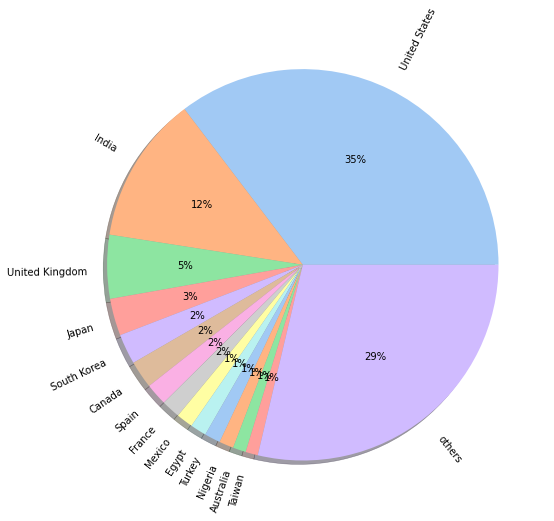

In [ ]:
# Porcentaje de peliculas y series por cada pais de origen (top 14)
paises = datos['country'].value_counts().sort_values(ascending=False)
catorce_paises = pd.DataFrame(paises.head(14))
porc = round((paises.head(14).sum() / paises.sum())*100,1)
catorce_paises = catorce_paises.reset_index().append({'index':'others','country':len(datos)-catorce_paises.sum()},ignore_index=True)
porcentaje = (catorce_paises['country'] / len(datos)) * 100
location = catorce_paises['index']
colors = sns.color_palette('pastel')
plt.pie(porcentaje, labels=location, colors=colors,  autopct='%.0f%%', shadow=True, rotatelabels='true')
print(f"Los 14 paises con mas peliculas y series tienen el {porc}% del total")
plt.show()


In [ ]:
datos['rating'].value_counts()

TV-MA       2931
TV-14       1930
R            788
TV-PG        773
PG-13        482
PG           281
TV-Y7        236
TV-Y         227
TV-G         190
NR            80
G             41
TV-Y7-FV       5
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [ ]:
#Encontramos que 3 peliculas tienen un rating erroneo desde la fuente de datos, procedemos a borrarlas
datos = datos[datos.rating != '66 min']
datos = datos[datos.rating != '84 min']
datos = datos[datos.rating != '74 min']
datos['rating'].value_counts()

TV-MA       2931
TV-14       1930
R            788
TV-PG        773
PG-13        482
PG           281
TV-Y7        236
TV-Y         227
TV-G         190
NR            80
G             41
TV-Y7-FV       5
NC-17          3
UR             3
Name: rating, dtype: int64

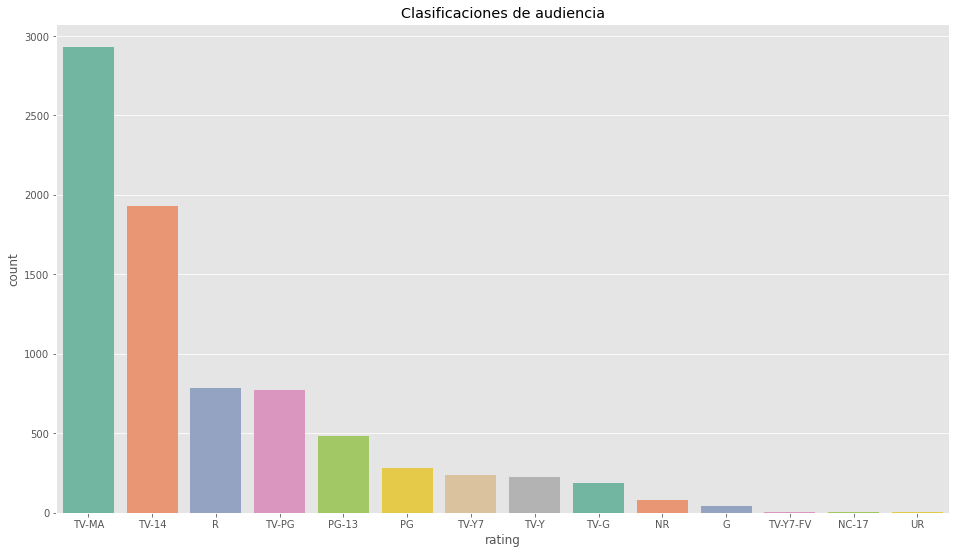

In [ ]:
ax = sns.countplot(x="rating", data=datos,palette="Set2", order=datos['rating'].value_counts().index).set(title='Clasificaciones de audiencia')

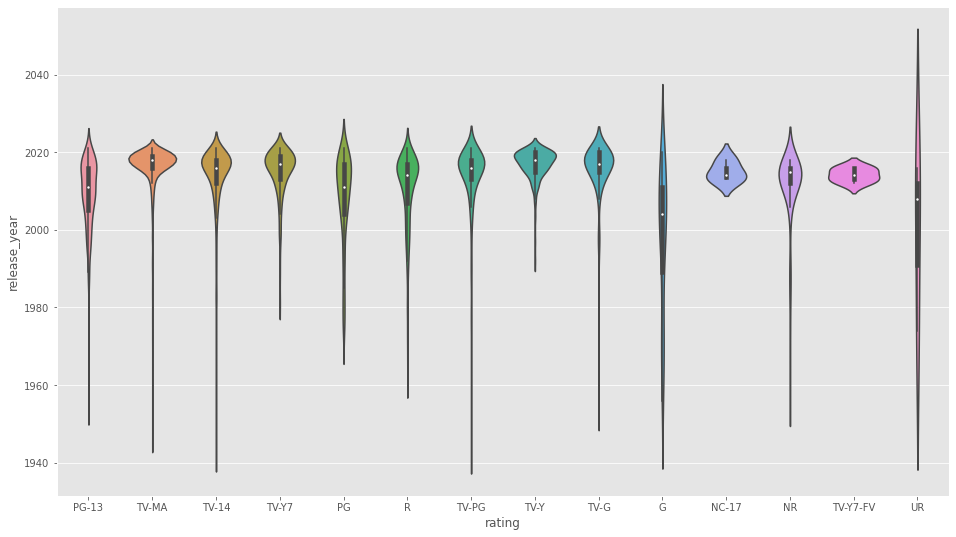

In [ ]:
sns.violinplot(x=datos['rating'], y=datos['release_year'])

[Text(0.5, 1.0, '15 Generos de contenido mas repetidos')]

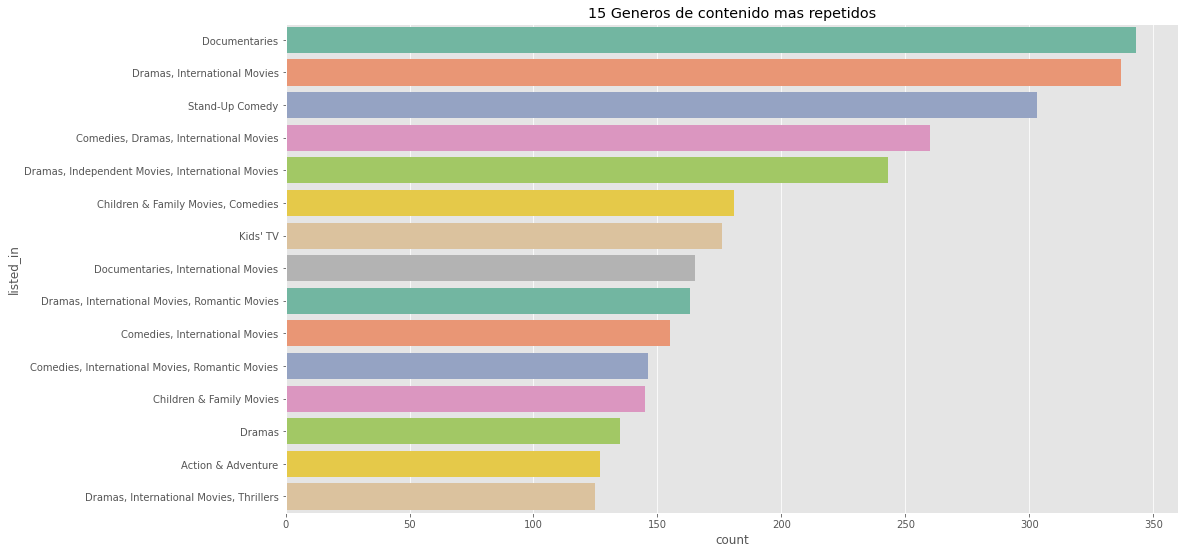

In [ ]:
sns.countplot(y="listed_in", data=datos, order = datos['listed_in'].value_counts().index[:15],palette="Set2").set(title='15 Generos de contenido mas repetidos')

In [ ]:
datos['listed_in'].value_counts()

Documentaries                                         343
Dramas, International Movies                          337
Stand-Up Comedy                                       303
Comedies, Dramas, International Movies                260
Dramas, Independent Movies, International Movies      243
                                                     ... 
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Horror Movies, LGBTQ Movies, Music & Musicals           1
TV Horror, TV Mysteries, Teen TV Shows                  1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 498, dtype: int64

###**2.3 Variables del problema**

Después de un análisis de las características encontramos que las mas interesantes para ayudarnos con la agrupación son: type, country, release_year, rating, listed_in

###**2.4 Conjuntos de entrenamiento**

No aplica porque es un problema de agrupamiento sin embargo si es necesario establecer cuales caracteristicas seran usadas para agrupar

In [ ]:
datosN = datos[['type', 'country', 'rating','listed_in']]#'release_year',
datosN

,type,country,rating,listed_in
0,Movie,United States,PG-13,Documentaries
1,TV Show,South Africa,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
4,TV Show,India,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."
7,Movie,"United States, Ghana, Burkina Faso, United Kin...",TV-MA,"Dramas, Independent Movies, International Movies"
8,TV Show,United Kingdom,TV-14,"British TV Shows, Reality TV"
...,...,...,...,...
8801,Movie,"United Arab Emirates, Jordan",TV-MA,"Dramas, International Movies, Thrillers"
8802,Movie,United States,R,"Cult Movies, Dramas, Thrillers"
8804,Movie,United States,R,"Comedies, Horror Movies"
8805,Movie,United States,PG,"Children & Family Movies, Comedies"


In [ ]:
#Completitud de los datos para agrupar
faltantes = datosN.isna().sum()/len(datosN)*100
porcentaje_faltantes = faltantes.sort_values(ascending=False)
print("Porcentaje de datos faltantes por columna:")
for indice, valor in porcentaje_faltantes.items():
  print(f'{indice} = {round(valor,1)}%')

Porcentaje de datos faltantes por columna:
type = 0.0%
country = 0.0%
rating = 0.0%
listed_in = 0.0%


###**2.5 Exploración de los datos**

No aplica porque es un problema de agrupamiento

###**2.6 Preparación de los datos**

No aplica ya que todas nuestras características a usar son categóricas y vamos a emplear la técnica K-Modes por lo cual no es necesario codificar o estandarizar las variables

##**3. INGENIERÍA DE MODELOS DE APRENDIZAJE AUTOMÁTICO**

###**3.1 Técnica de modelado**

Nuestro problema es de agrupación no supervisada con un dataset categórico, no jerárquico y mediante el método del codo podemos hallar el número de grupos por lo tanto la técnica a usar será K-Modes

**CAO Initialization Method**
In clustering algorithms, choosing a subset of representative examples is very important in data set. Such "exemplars" can be found by randomly choosing an initial subset of data objects and then iteratively refining it, but this works well only if that initial choice is close to a good solution. In this paper, based on the frequency of attribute values, the average density of an object is defined. Furthermore, a novel initialization method for categorical data is proposed, in which the distance between objects and the density of the object is considered. We also apply the proposed initialization method to k-modes algorithm and fuzzy k-modes algorithm. Experimental results illustrate that the proposed initialization method is superior to random initialization method and can be applied to large data sets for its linear time complexity with respect to the number of data objects.

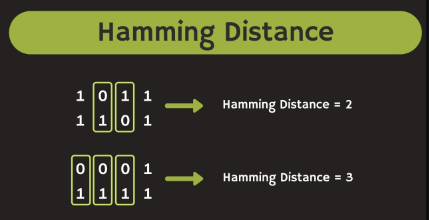

Usando K= 1
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 20104.0
Usando K= 2
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 17667.0
Usando K= 3
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1215, cost: 16068.0
Run 1, iteration: 2/100, moves: 1, cost: 16068.0
Usando K= 4
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1296, cost: 15570.0
Run 1, iteration: 2/100, moves: 1, cost: 15570.0
Usando K= 5
Initialization m

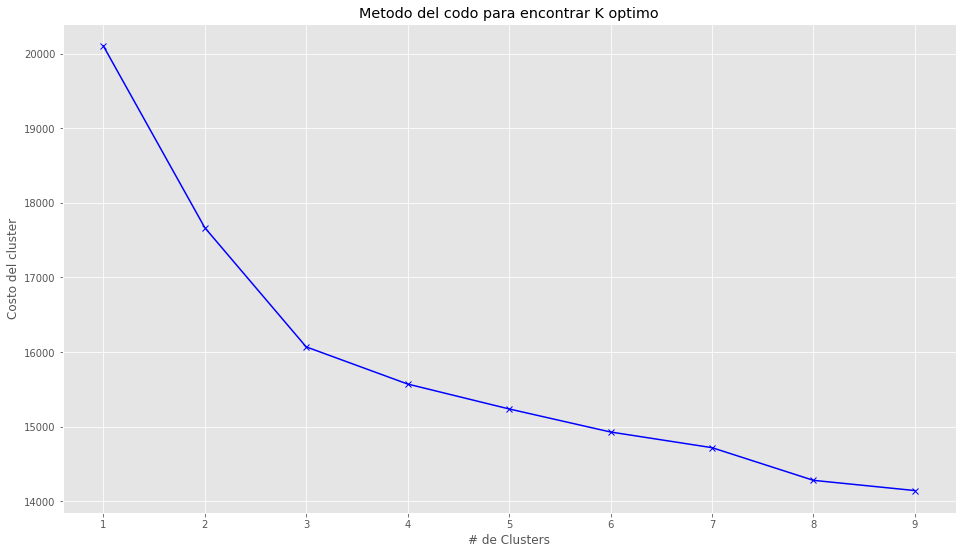

In [ ]:
#K-Modes

# Generamos un grafico de codo para determinar el numero optimo de K
cost = []
K = range(1,10)
for num_clusters in list(K):
    print("Usando K=",num_clusters)
    kmodes = KModes(n_clusters=num_clusters, init = "Cao", verbose=1)
    kmodes.fit_predict(datosN)
    cost.append(kmodes.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('# de Clusters')
plt.ylabel('Costo del cluster')
plt.title('Metodo del codo para encontrar K optimo')
plt.show()

El codo aparece en 3 por lo tanto este será el hiper parámetro a usar en nuestro modelo

Inicialmente estabamos incluyendo la caracteristica Release Year sin embargo al ser numerica estaba ocasionando un K = 2 y los grupos se volvian mas variados

In [ ]:
#Intento de usar metodo silhouette
# from sklearn.metrics import silhouette_score


# numeroCluster = range(2,20)
# valoresMedios = []

# for n_clusters in numeroCluster:
#   modeloKmodes =  KModes(n_clusters=num_clusters, init = "Cao")
#   labels = modeloKmodes.fit_predict(datosN)
#   mediaSilhouette =silhouette_score(datosN, labels, metric="hamming")
#   valoresMedios.append(mediaSilhouette)

# plt.plot(numeroCluster, valoresMedios)
# plt.xlabel('Número Grupos (K)')
# plt.ylabel('Media de indices Silhouette')
# plt.title('Indice Silhouette')


###**3.2 Ejercicio de modelado**

In [ ]:
# Modelo K-Modes usando 3 clusters - K=3
kmodes = KModes(n_clusters=3, init = "Cao", verbose=1)
clusters = kmodes.fit_predict(datosN)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1215, cost: 16068.0
Run 1, iteration: 2/100, moves: 1, cost: 16068.0


In [ ]:
#Insertamos la columna Cluster a nuetro dataset de agrupacion
datosN.insert(0, "Cluster", clusters, True)
datosN

,Cluster,type,country,rating,listed_in
0,0,Movie,United States,PG-13,Documentaries
1,0,TV Show,South Africa,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
4,0,TV Show,India,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."
7,0,Movie,"United States, Ghana, Burkina Faso, United Kin...",TV-MA,"Dramas, Independent Movies, International Movies"
8,2,TV Show,United Kingdom,TV-14,"British TV Shows, Reality TV"
...,...,...,...,...,...
8801,0,Movie,"United Arab Emirates, Jordan",TV-MA,"Dramas, International Movies, Thrillers"
8802,0,Movie,United States,R,"Cult Movies, Dramas, Thrillers"
8804,0,Movie,United States,R,"Comedies, Horror Movies"
8805,0,Movie,United States,PG,"Children & Family Movies, Comedies"


In [ ]:
#Exportamos los resultados
datosN.to_excel("exportdata.xlsx")

In [ ]:
#Centroides finales de nuestros clusters
kmodes.cluster_centroids_

#Estos centroides representan mas o menos la moda, en otras palabras nos acercan a los valores que representan la mayoria del inventario de Netflix

array([['Movie', 'United States', 'TV-MA', 'Documentaries'],
       ['Movie', 'India', 'TV-14', 'Dramas, International Movies'],
       ['TV Show', 'United States', 'TV-14', "Kids' TV"]], dtype='<U28')

In [ ]:
#Tambien podemos agregar los Cluster a la tabla completa inicial
datos.insert(0, "Cluster", clusters, True)
datos

,Cluster,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,0,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,0,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,2,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,0,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,0,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,0,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,0,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
datos

,Cluster,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,0,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,0,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,2,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,0,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,0,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,0,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,0,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


###**3.3 Evaluación**

No Aplica ya que es un ejercicio de agruapacion no supervisada

##**4. ASEGURAMIENTO DE LA CALIDAD**

En esta fase es en donde se evalúa el sistema ingresándole ruido para detallar su comportamiento.
Como ya se tiene unas características de entrada definidas y nuestro modelo utiliza K-mode, se debe validad que los nuevos datos sean solo de tipo categóricos, de lo contrario el modelo fallaría.
 Unas vez hecha esa validación, debemos revisar que la categoría ingresada, se encuentra dentro las que se utilizaron para entrenar el modelo, de lo contrario se convierte en una nueva categoría la cual se debe guardar en el sistema para un futuro entrenamiento.


##**5. DESPLIEGUE**

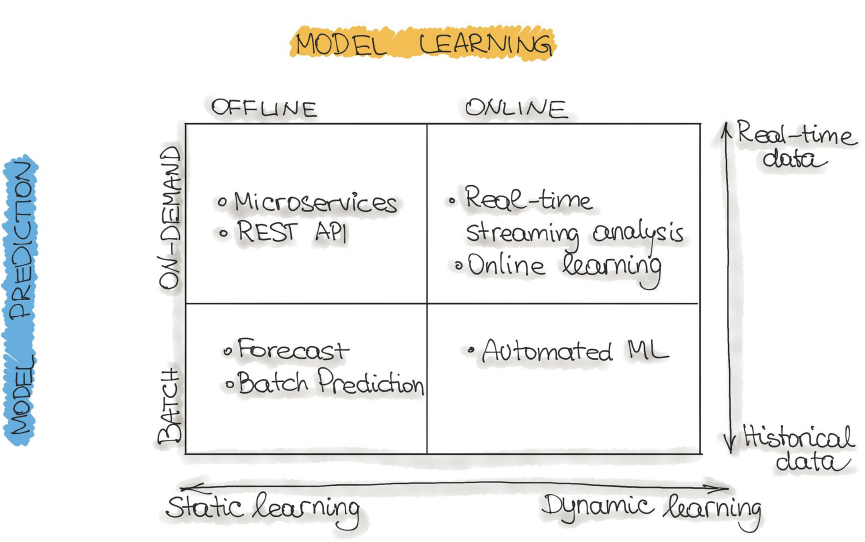

Basados en la imagen anterior podremos determinar que el patrón para servir el modelo, recomendamos una batch prediction, debido a que nuestro modelo utiliza datos históricos y estáticos, se haría un entrenamiento offline y una predicción por baches semanal.
Como solución se propone un servicio con Lambda de AWS que toma los datos de la predicción semanal desde un bucket de S3. El usuario del aplicativo consumiría un API que se disponibiliza a través del servicio API gateway.


##**6. MONITOREO Y MANENIMIENTO**

Como hemos observado, el modelo inicial es de clusterización y además es con la técnica del modelo kmodes, por lo tanto, hasta este punto no se cuenta con métricas de evaluación, sin embargo, con el planteamiento de datos exógenos y el KPI, semanalmente se monitorea ese KPI por cada suscriptor.
Si el promedio del KPI baja mas del 50 % se reentrenaría el modelo o se cambia de modelo.


##**ARQUITECTURA**

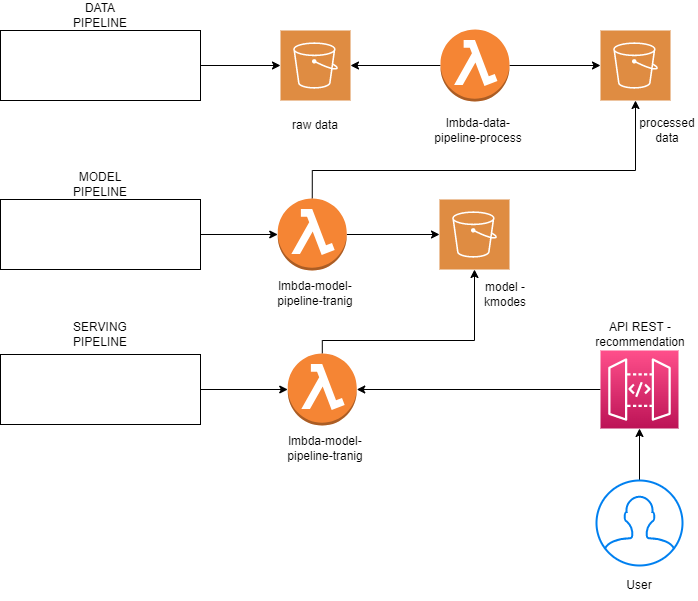

# **AWS**

In [ ]:
! pip install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 132 kB 5.0 MB/s 
     |████████████████████████████████| 79 kB 8.4 MB/s 
     |████████████████████████████████| 9.9 MB 52.2 MB/s 
     |████████████████████████████████| 140 kB 60.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.13 which is incompatible.


## DATA PIPELINE

Envio de archivo (data raw) llamado 'netflix_titles.csv' en  un Bucket de AWS llamado mlops-data-pipeline

Carga de datos inicial

In [ ]:
import boto3
from botocore.exceptions import NoCredentialsError
from io import BytesIO

ACCESS_KEY = 'XXXXXXXXXXXXXXX'
SECRET_KEY = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXX'


def upload_raw_data_to_aws(local_file, bucket, s3_file):
    s3 = boto3.client('s3', aws_access_key_id=ACCESS_KEY,
                      aws_secret_access_key=SECRET_KEY)

    try:
        s3.upload_file(local_file, bucket, s3_file)
        print("Upload Successful")
        return True
    except FileNotFoundError:
        print("The file was not found")
        return False
    except NoCredentialsError:
        print("Credentials not available")
        return False


uploaded = upload_raw_data_to_aws('/content/netflix_titles.csv', 'mlops-data-pipeline', 'raw/netflix_titles.csv')

Upload Successful


Leer csv desde S3

In [ ]:
"""
Demo script for reading a CSV file from S3 into a pandas data frame using the boto3 library
"""

import os

import boto3
import pandas as pd


AWS_S3_BUCKET = 'mlops-data-pipeline'
AWS_ACCESS_KEY_ID = 'XXXXXXXXXXXX'
AWS_SECRET_ACCESS_KEY = 'XXXXXXXXXXXXXXXXXXXXXX'
# AWS_SESSION_TOKEN = os.getenv("AWS_SESSION_TOKEN")

s3_client = boto3.client(
    "s3",
    aws_access_key_id=AWS_ACCESS_KEY_ID,
    aws_secret_access_key=AWS_SECRET_ACCESS_KEY,
    # aws_session_token=AWS_SESSION_TOKEN,
)

response = s3_client.get_object(Bucket=AWS_S3_BUCKET, Key="raw/netflix_titles.csv")

status = response.get("ResponseMetadata", {}).get("HTTPStatusCode")

if status == 200:
    print(f"Successful S3 get_object response. Status - {status}")
    shows_df = pd.read_csv(response.get("Body"))
    print(shows_df.head(5))
else:
    print(f"Unsuccessful S3 get_object response. Status - {status}")

Successful S3 get_object response. Status - 200
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  T

Code: Lambda-data-pipeline

In [ ]:
import json
from botocore.exceptions import NoCredentialsError
from io import BytesIO
import boto3
import os
import pandas as pd

def upload_process_data_to_aws(local_file, bucket, s3_file):
    s3 = boto3.client('s3')

    try:
        s3.upload_file(local_file, bucket, s3_file)
        return True
    except FileNotFoundError:
        return False
    except NoCredentialsError:
        return False

def lambda_handler(event, context):
    AWS_S3_BUCKET = 'mlops-data-pipeline'

    s3_client = boto3.client(
        "s3"
    )
    
    response = s3_client.get_object(Bucket=AWS_S3_BUCKET, Key="raw/netflix_titles.csv")
    
    status = response.get("ResponseMetadata", {}).get("HTTPStatusCode")
    
    if status == 200:
        shows_df = pd.read_csv(response.get("Body"))
    else:
        pass
    
    shows_df[['director', 'cast']] = shows_df[['director', 'cast']].fillna(value='unknown')
    
    shows_df.dropna(subset = ['rating', 'country'], inplace=True)
    
    shows_df = shows_df[shows_df.rating != '66 min']
    shows_df = shows_df[shows_df.rating != '84 min']
    shows_df = shows_df[shows_df.rating != '74 min']
    shows_df['rating'].value_counts()
    
    shows_df = shows_df[['type', 'country', 'rating','listed_in']]
    
    shows_df.to_csv('/tmp/netflix_titles.csv', index=False)
    
    
    uploaded = upload_process_data_to_aws('/tmp/netflix_titles.csv', 'mlops-data-pipeline', 'processed/netflix_titles.csv')
    
    return {
        'statusCode': 200,
        'body': json.dumps('Hello from Lambda!')
    }

## MODELING: MODEL PIPELINE

1. Volvemos a entrenar el modelo con el que me quiero quedar, el modelo que va a servir.

2. Ese modelo se guarda en un archivo con extensión .sav (es un archivo seriarizable para cargar posteriormente para ser usado)

3. subir modelo cargado a S3

Función encontrada para subir a AWS

In [ ]:
import boto3

ACCESS_KEY = 'XXXXXXXXXXXXXXX'
SECRET_KEY = 'XXXXXXXXXXXXXXXXXXXXXXXXX'


def upload_model_to_aws(local_file, bucket, s3_file):
    s3 = boto3.client('s3', aws_access_key_id=ACCESS_KEY,
                      aws_secret_access_key=SECRET_KEY)

    try:
        s3.upload_file(local_file, bucket, s3_file)
        print("Upload Successful")
        return True
    except FileNotFoundError:
        print("The file was not found")
        return False
    except NoCredentialsError:
        print("Credentials not available")
        return False


uploaded = upload_model_to_aws('/content/exportdata.sav', 'mlops-model-pipiline', 'kmodes_model/netflix_titles_model.sav')

Upload Successful


In [ ]:
import json
from kmodes.kmodes import KModes
import boto3
import pandas as pd

def upload_model_to_aws(local_file, bucket, s3_file):
    s3 = boto3.client('s3')

    try:
        s3.upload_file(local_file, bucket, s3_file)
        print("Upload Successful")
        return True
    except FileNotFoundError:
        print("The file was not found")
        return False
    except NoCredentialsError:
        print("Credentials not available")
        return False


def lambda_handler(event, context):
    
    AWS_S3_BUCKET = 'mlops-data-pipeline'

    s3_client = boto3.client(
        "s3"
    )
    
    response = s3_client.get_object(Bucket=AWS_S3_BUCKET, Key="processed/netflix_titles.csv")
    
    status = response.get("ResponseMetadata", {}).get("HTTPStatusCode")
    
    if status == 200:
        shows_df = pd.read_csv(response.get("Body"))
    else:
        pass
    
    
    kmodes = KModes(n_clusters=3, init = "Cao", verbose=1)
    clusters = kmodes.fit_predict(shows_df)
    
    upload_model_to_aws('/content/exportdata.sav', 'mlops-model-pipiline', 'kmodes_model/netflix_titles_model.sav')
    
    return {
        'statusCode': 200,
        'body': json.dumps('Hello from Lambda!')
    }

Para este pipeline se entrenó y cargó el modelo manualmente a S3, debido a la limitación (un layer en aws solo soporta 250 MB no comprimidas).

## SERVING PIPELINE

Para dar solución se creó un entorno virtual en cloud9 en donde se descargó el archivo zip después de haber instalado el modelo (pip install kmodes), posteriormente se borraron las librerías como numpy, pandas, scipy, sklearn para bajar peso al archivo que original mente pesaba aproximadamente 89 MB comprimido.
Luego se creó la capa manualmente en esta lambda y las dependencias borradas se importaron como capas optimizadas por medio de un ARN.


In [ ]:
import json
import pickle
import boto3
import numpy as np
from kmodes.kmodes import KModes

def lambda_handler(event, context):
    
    AWS_S3_BUCKET = 'mlops-model-pipiline'

    s3_client = boto3.client(
        "s3"
    )
    
    response = s3_client.get_object(Bucket=AWS_S3_BUCKET, Key="kmodes_model/netflix_titles_model.sav")
    
    status = response.get("ResponseMetadata", {}).get("HTTPStatusCode")
    
    if status == 200:
        #shows_df = pd.read_csv(response.get("Body"))
        kmodes_model = pickle.loads(response.get("Body").read())
    else:
        pass

    input_data = np.array([event["type"], event["country"], event["rating"], event["listed_in"]]).reshape(1,-1)
    cluster = kmodes_model.predict(input_data)
    
    
    return {
        'statusCode': 200,
        'body': json.dumps({"numero de cluster al que pertenece":str(cluster[0])})
    }

Despliegue con API

In [ ]:
import json
import pickle
import boto3
import numpy as np
from kmodes.kmodes import KModes

def lambda_handler(event, context):
    
    AWS_S3_BUCKET = 'mlops-model-pipiline'

    s3_client = boto3.client(
        "s3"
    )
    
    response = s3_client.get_object(Bucket=AWS_S3_BUCKET, Key="kmodes_model/netflix_titles_model.sav")
    
    status = response.get("ResponseMetadata", {}).get("HTTPStatusCode")
    
    if status == 200:
        #shows_df = pd.read_csv(response.get("Body"))
        kmodes_model = pickle.loads(response.get("Body").read())
    else:
        pass
        
    
    # input_data = np.array([event["type"], event["country"], event["rating"], event["listed_in"]]).reshape(1,-1)
    # cluster = kmodes_model.predict(input_data)
    
    input_data = np.array([
        event['queryStringParameters']["type"], 
        event['queryStringParameters']["country"], 
        event['queryStringParameters']["rating"], 
        event['queryStringParameters']["listed_in"]]).reshape(1,-1)
        
    cluster = kmodes_model.predict(input_data)
    
    
    return {
        'statusCode': 200,
        'headers' : {
        'Content-Type':'application/json'
        },
        'body': json.dumps({"numero de cluster al que pertenece":str(cluster[0])})
    }

event

In [ ]:
{
  "type": "TV Show",
  "country": "India",
  "rating": "TV-PG",
  "listed_in": "International TV Shows, TV Dramas"
}

Se creó un REST API con el servicio de API Gateway, donde se tiene un recurso llamado recommendation y una petición GET que recibe los parámetros.

Type.

Country.

Rating.

Listed_in.


El linck para comsumir es:

https://ckmf7e5uig.execute-api.us-east-1.amazonaws.com/release-1/recommendation?type=TV%20Show&country=Norway&rating=R&listed_in=International%20TV%20Shows,%20TV%20Dramas,%20TV%20Thrillers